# Build GPT from Scratch  - from 0 to a function completed GPT model. 

## Linear transformation 

Image we have two vectors, $V_1, V_2$ 

$$V_1 = (a_1, b_1)$$
$$V_2 = (a_2, b_2)$$

If we want build a new vector based on these two vectors, we can get a arbitary vector $V_3$, by 

$$ V_3 = \alpha * V_1 + \beta * V_2$$

by change the $\alpha$ and $\beta$, if and only if $V_1$ is not $k * V_2$, we can get any $ V_3 $

This is called **Linear Transformation**

What's is the Linear Transfomer 

![](imgs/moving_vector.svg)

## We can get any vector by given different $\alpha, \beta$ 

![](imgs/all_vectors_move.png)

## Rewrite this as a matrix

$$\vec{E_3} = \alpha \vec{E_1} + \beta \vec{E_2} $$

if we define matrix as $ W_{weight} = \begin{pmatrix} \alpha , \beta \end{pmatrix} $,  $ E =  \begin{pmatrix} \vec{E_1} \\ \vec{E_2} \end{pmatrix} = \begin{pmatrix} e_{11}, e_{12}, e_{1.}, e_{1n} \\ e_{21}, e_{22}, e_{2.}, e_{2n} \end{pmatrix}$ 

therefore, we can define $ \begin{align} W_{weight} \cdot E &=  \alpha \vec{E_1} + \beta \vec{E_2} \\ &= (\alpha * e_{11} + \beta * e_{21}, \alpha * e_{21} + \beta * e_{22}, \dots, \alpha * e_{1N} + \beta * e_{2N}) \end{align} $ 

we define this single vector output as $\overrightarrow{E_{composed}}$, we set as $\vec{E_c} $,   which, $ \| \mathbf{E_c} \| = N$

therefore, if we have some initial embedding of two words of one sentence, $w_1, w_2$, which is $\vec{E_1}$, $\vec{E_2}$. Firstly, we can get the composition vector by the abvove **linear transformation**, getting $\vec{E_c} $, which, $ \| \mathbf{E_c} \| = N$

if we want to get the predicated $w_3$ by $\vec{E_c}$, we can use this result as input, by a **linear transformation** $W_u^{n * V}$, we get the predicated word by: 

$$ W_u^{n * V} = \begin{pmatrix} w_{11}, w_{12}, ..., w_{1V} \\ w_{21}, w_{22}, ..., w_{2V} \\ ..., ..., ..., ... \\ w_{n1}, w_{n2}, ..., w_{nV} \end{pmatrix}   $$



$$ \vec{E_c} \cdot W_u =  (\alpha * e_{11} + \beta * e_{21}, \alpha * e_{21} + \beta * e_{22}, \dots, \alpha * e_{1N} + \beta * e_{2N}) \cdot \begin{pmatrix} w_{11}, w_{12}, ..., w_{1V} \\ w_{21}, w_{22}, ..., w_{2V} \\ ..., ..., ..., ... \\ w_{n1}, w_{n2}, ..., w_{nV} \end{pmatrix} $$

$$ \therefore \vec{Pr} = \begin{pmatrix} \sum_{i} w_{i1} * (\alpha*e_{1i} + \beta * e_{2i}) \\  \sum_{i} w_{i2} * (\alpha*e_{1i} + \beta * e_{2i}) \\ \sum_{i} w_{i \cdot} * (\alpha*e_{1i} + \beta * e_{2i}) \\ ... \\ \sum_{i} w_{iV} * (\alpha*e_{1i} + \beta * e_{2i}))  \end{pmatrix},  \| \mathbf{Pr} \| = V $$

but, current now the Pr may not belong to 0 ~ 1, therefore, we need 

$$  \therefore \vec{Pr} = softmax \left[ \begin{pmatrix} \sum_{i} w_{i1} * (\alpha*e_{1i} + \beta * e_{2i}) \\  \sum_{i} w_{i2} * (\alpha*e_{1i} + \beta * e_{2i}) \\ \sum_{i} w_{i \cdot} * (\alpha*e_{1i} + \beta * e_{2i}) \\ ... \\ \sum_{i} w_{iV} * (\alpha*e_{1i} + \beta * e_{2i}))  \end{pmatrix}\right], \| \mathbf{Pr} \| = V  $$ 

Then, we can get the predicated token index by $argmax(Pr)$

By given the loss function to let this model can predicate the **right** next tokens, we can use backpropatation to get the value of $\vec{E_1}, \vec{E_2}$

### In conclusion, current now, we can get the predicated $word_{id}$ by give $word_1, word_2$

#### Thinking about this, if $ Pr(w_3 | w_1, w_2) \approx Pr(w_3 |w_1, w_X) $ Then, we can know the embedding   $ \vec{E_x} \approx \vec{E_2}$, and because $w_2$ and $w_x$ have similar context (surrounding) words, which are $w_1, w_3$ , then $w_3$ and $w_n$, stastically, have the similar semantic meaning. 

## Therefore, we find a way, could give each word an embedding vector $\vec{E_i}$, if there are two words have similar semantic meaning, these two words will hold the similar embeddings. 

![](imgs/word_embedding.jpeg)

## Moreover, these embedding are not like the formal word vectors, which are corresponding to different words, these word embedding are corresponding to: 

### 1. Different Words; 
### 2. DIfferent Sentences; 

## Therefore

By this mechanism,  if two words are idential spelled, but they are in different sentences, these words will get different embedding composition $\vec{E_{c}}$. 

## let's consider the previous computing procedure. 

$ W_{weight} = \begin{pmatrix} \alpha , \beta \end{pmatrix} $,  $ E =  \begin{pmatrix} \vec{E_1} \\ \vec{E_2} \end{pmatrix} = \begin{pmatrix} e_{11}, e_{12}, e_{1.}, e_{1n} \\ e_{21}, e_{22}, e_{2.}, e_{2n} \end{pmatrix}$ 

$ \begin{align} W_{weight} \cdot E &=  \alpha \vec{E_1} + \beta \vec{E_2} \\ &= (\alpha * e_{11} + \beta * e_{21}, \alpha * e_{21} + \beta * e_{22}, \dots, \alpha * e_{1N} + \beta * e_{2N}) \end{align} $ 

These vectors $\vec{E_1}, \vec{E_2}$ are some initial embedding of each vector, or the words' embedding values. Therefore, we can change these vectors to **values vector** ->  $V_i$

Another question is how can we get the $W_{weight}$, or the $\alpha, \beta$ in $\mathbf{W}$, how can we get them.  

A very strightforward way is use a set of learnable parameters, $\alpha => w_1, \beta => w_2$, we can learn these parameters by backpropation. 

**However**, if we funtionally analysis the matrix $\mathbf{W}$, the value about is actually is important of $\vec{V_i}$. Therefore, if we want to calculate the right **weights**， we need some information about $\vec{E_i}$. 

Likely, if we want to know each person's importance in some task, we need to know the characters of these persons. 

So, the $\mathbf{W}$ actually is a collection of some results of $\vec{V_i}, i \in N $ or marix $\mathbf{V}$. 

**However**, there is still a problem, "is the vector $\vec{E_i}$ is with the enough representation power to get the right **weights**? 

What's the "representation power" or "representation capability"? 

For example you want to analysis if a person is a good person, we need some representation of this person. Current now, a person's representation, for example, is a 3-dimension, (age, height, income); In order to get some more predicatable representation of this person, we need a corresponding vector of this person, for example, we can give it a 10-dimension representation, in this 10-dimension vector, we include the (age, income, weight, height, city, position, temperature, educated, ..., INFO)

In this example, the person is the vector $\vec{E_i}$, some representation we need define a learnable **vector**, by adjusting its length and value, we can evaluate the importance(*weight*)of this **vector $\vec{E_i}$**. Similarly, as we ranking and reterievel entities in dataset or in search engineeing, we name the representation for our evaluation or weighting of one entity as **key** vector. 

We can combine **keys** and **values** as multiple **k-v** sets.

Therefore, current now, in order to get weights of our vector **values**, we need combine them with **key** vectors, as sets: 

$$ \mathbf{Keys-Vectors} = \begin{pmatrix} \vec{K_1}, \vec{V_1} \\ \vec{K_2}, \vec{V_2} \\ \vec{K_i}, \vec{V_i} \\ \vec{K_N}, \vec{V_N} \end{pmatrix} $$

Therefore, if we want to know the $Token_{n+1}$, giving words $word_1, word_2, ..., word_N$, we can use a vector to **query** the importances of each vector **values** by the caculation with vector **keys**. 

Therefore, in order to evaluate the important of given *N* words,  we will use the **query vector**, $Q = (q_1, q_2, q_3, .. q_d)$ with **key vectors** 

$$\begin{align} \mathbf{K} &= \begin{pmatrix} \vec{K_1} \\ \vec{K_2} \\ , ... \\ , \vec{K_n}\end{pmatrix} \\ &= \begin{pmatrix} k_{11}, k_{12}, k_{13}, .. k_{1d} \\   k_{21}, k_{22}, k_{23}, .. k_{2d} \\  k_{\cdot 1}, k_{\cdot 2}, k_{\cdot 3}, .. k_{\cdot d} \\  k_{N1}, k_{N2}, k_{N3}, ... k_{Nd} \end{pmatrix} \end{align}$$

$$ \begin{align} \vec{W} = QK^T &= (q_1, q_2, q_3, ... q_d) \cdot \begin{pmatrix} k_{11}, k_{21}, k_{\cdot 1}, k_{N1} \\ k_{12}, k_{22}, k_{\cdot 2}, k_{N2} \\ k_{1 (d-i)}, k_{2 (d-i)}, k_{\cdot (d-i)}, k_{N (d-i)}\\ k_{1d}, k_{2d}, k_{\cdot d}, k_{Nd}  \end{pmatrix} \\ &= \begin{pmatrix}\sum_{i \in d}{q_i} * k_{1i}, \sum_{i \in d}{q_i} * k_{2i}  \sum_{i \in d}{q_i} * k_{\cdot i}, \sum_{i \in d}{q_i} * k_{Ni} \end{pmatrix}, |\mathbf{W} | = N \\ &:= (w_i, w_2, w_3, ... w_N) \end{align} $$

Then, we can get the composition result by $\vec{W}$ and vector **values**

$$ \begin{align} \vec{W}_{1, N} \cdot \mathbf{V} &= \begin{pmatrix} w_1, w_2, w_3, ... w_n \end{pmatrix} \begin{pmatrix} \vec{V_1} \\ \vec{V_2} \\ \vec{V_3} \\ \vec{V_x} \\ \vec{V_N} \end{pmatrix} \\ &= \sum_{i \in N}w_i * \vec{V_i} \end{align} $$

### From one query to multiply query

If we use N-query vectors at once, we can get multiple outputs simultaneously. 

$$ \begin{align} \mathbf{Q}_{N, d} K^T = \begin{pmatrix} \vec{Q_1} \\ \vec{Q_2} \\ \vec{Q_i} \\ \vec{Q_N} \end{pmatrix} \cdot K^T &= \begin{pmatrix} q_{11}, q_{12}, q_{13}, ... q_{1d} \\ q_{21}, q_{22}, q_{23}, ... q_{2d} \\ q_{\cdot 1}, q_{\cdot 2}, q_{\cdot 3}, ... q_{\cdot d} \\ q_{N1}, q_{N2}, q_{N3}, ... q_{Nd} \end{pmatrix} \cdot \begin{pmatrix} k_{11}, k_{21}, k_{\cdot 1}, k_{N1} \\ k_{12}, k_{22}, k_{\cdot 2}, k_{N2} \\ k_{1 (d-i)}, k_{2 (d-i)}, k_{\cdot (d-i)}, k_{N (d-i)}\\ k_{1d}, k_{2d}, k_{\cdot d}, k_{Nd}  \end{pmatrix} \\ &= \begin{pmatrix}
\sum_{i \in d}{q_1i} * k_{1i}, \sum_{i \in d}{q_2i} * k_{2i}, \sum_{i \in d}{q_1i} * k_{j i}, \sum_{i \in d}{q_1i} * k_{Ni}  \\ 
\sum_{i \in d}{q_2i} * k_{1i}, \sum_{i \in d}{q_2i} * k_{2i}, \sum_{i \in d}{q_2i} * k_{j i}, \sum_{i \in d}{q_2i} * k_{Ni} \\
\sum_{i \in d}{q_xi} * k_{1i}, \sum_{i \in d}{q_xi} * k_{2i}, \sum_{i \in d}{q_xi} * k_{j i}, \sum_{i \in d}{q_xi} * k_{Ni} \\
\sum_{i \in d}{q_Ni} * k_{1i}, \sum_{i \in d}{q_Ni} * k_{2i}, \sum_{i \in d}{q_Ni} * k_{j i}, \sum_{i \in d}{q_Ni} * k_{Ni}
\end{pmatrix}, 
|\mathbf{W} | = N \\ &:= \begin{pmatrix}  w_{11}, w_{12}, w_{13}, ... w_{1N} \\
 w_{21}, w_{22}, w_{23}, ... w_{2N} \\
 w_{x1}, w_{x2}, w_{x3}, ... w_{xN} \\
 w_{N1}, w_{N2}, w_{N3}, ... w_{NN} 
\end{pmatrix} = \mathbf{W} \end{align} $$

$$ \begin{align} \vec{W}_{1, N} \cdot \mathbf{V} &= \begin{pmatrix}  w_{11}, w_{12}, w_{13}, ... w_{1N} \\
 w_{21}, w_{22}, w_{23}, ... w_{2N} \\
 w_{x1}, w_{x2}, w_{x3}, ... w_{xN} \\
 w_{N1}, w_{N2}, w_{N3}, ... w_{NN} 
\end{pmatrix} \begin{pmatrix} \vec{V_1} \\ \vec{V_2} \\ \vec{V_3} \\ \vec{V_x} \\ \vec{V_N} \end{pmatrix} \\ &= \begin{pmatrix} 
\sum_{i \in N} w_1i * \vec{V_i} \\ 
\sum_{i \in N} w_2i * \vec{V_i} \\ 
\sum_{i \in N} w_xi * \vec{V_i} \\ 
\sum_{i \in N} w_Ni * \vec{V_i} 
\end{pmatrix} \end{align} $$

We named the Q,K,V 's result as **attention** 

$$ \mathbf{Attention}(Q, K, V) = softmax(QK^T)V  $$

in softmax, is the values are too large, will have some exploding computing result. because of the $e^x$ operators. Therefore, we need to normalization as, the simplest normalize way is to divide the length of $\mathbf{K} := d_k$

$$ \mathbf{Attention}(Q, K, V) = softmax(\frac{QK^T}{\sqrt{d_k}})V  $$

This attention **embeddings** are some composition results of the input **tokens** and the corresponding **embedding** values. 

## Positional Encoding

make use of the order of the sequence, for example: 

- Is this a cat
- This is a cat

or 

- Tom hates Jack 
- Jack hates Tom

The combined result of if the first output emebding of these two sentence are both:

$$ 0.5 * 'tom' + 0.3 * 'hates' + 0.2 * 'jack' $$

The result should be different, because the different positions actually are mapping different meaning. 

So, how can we assign each vector with different positions? 

$$ \mathbf{Position Encoding} =  PE_{(pos, 2i)} = sin(pos / 10000^{2i / d_{model}}) $$
$$ \mathbf{Position Encoding} =  PE_{(pos, 2i+1)} = cos(pos / 10000^{2i / d_{model}}) $$

In [1]:
import numpy as np

In [2]:
d_model = 32

In [3]:
pos = np.arange(500)

In [10]:
D = 500
i = 200

In [26]:
max_seq_len = 100

In [44]:
div_term = np.exp(np.arange(0, max_seq_len, 2) * (-np.log(10000.0) / d_model))

In [53]:
pe = np.zeros((max_seq_len, ))

In [55]:
position_0 = np.arange(0, max_seq_len, 2)
position_1 = np.arange(1, max_seq_len, 2)

In [59]:
pe[0::2] = np.sin(position_0 * div_term)
pe[1::2] = np.cos(position_1 * div_term)

In [18]:
import matplotlib.pyplot as plt

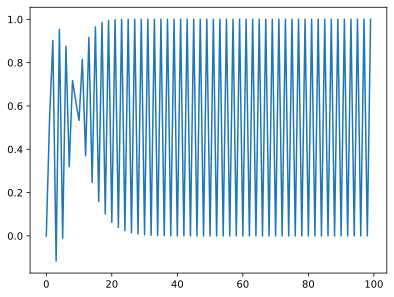

In [60]:
plt.plot(pe)

## After than: the **value** embedding of each token is $ \vec{e_t} = \vec{W}_et + \vec{W}_pt $

## After the attention vectors are caculated, the final representation of each tokens are: 

$$ \vec{e_t} = \vec{e_t} + \vec{Att_t} $$ 

then  add by **layer normalization** 

 $$ output = layernormal(\vec{e}) $$

```python
from torch import nn 
self.layer_norm = nn.LayerNorm(d_model)
```

## Feedforward

$$ FFN(x) = max(0, xW_1 + b_1) W_2 + b_2 $$

## MultiHead(Q, K, V)

$$ MultiHead(Q, K, V) = Concat(head1, head2, ... head_h) W^O  \\ \text{where} \space head_i = Attention(QW_i^Q, KW_i^Q, VW_i^Q)$$

## Encoder-Decoder Mechanism 

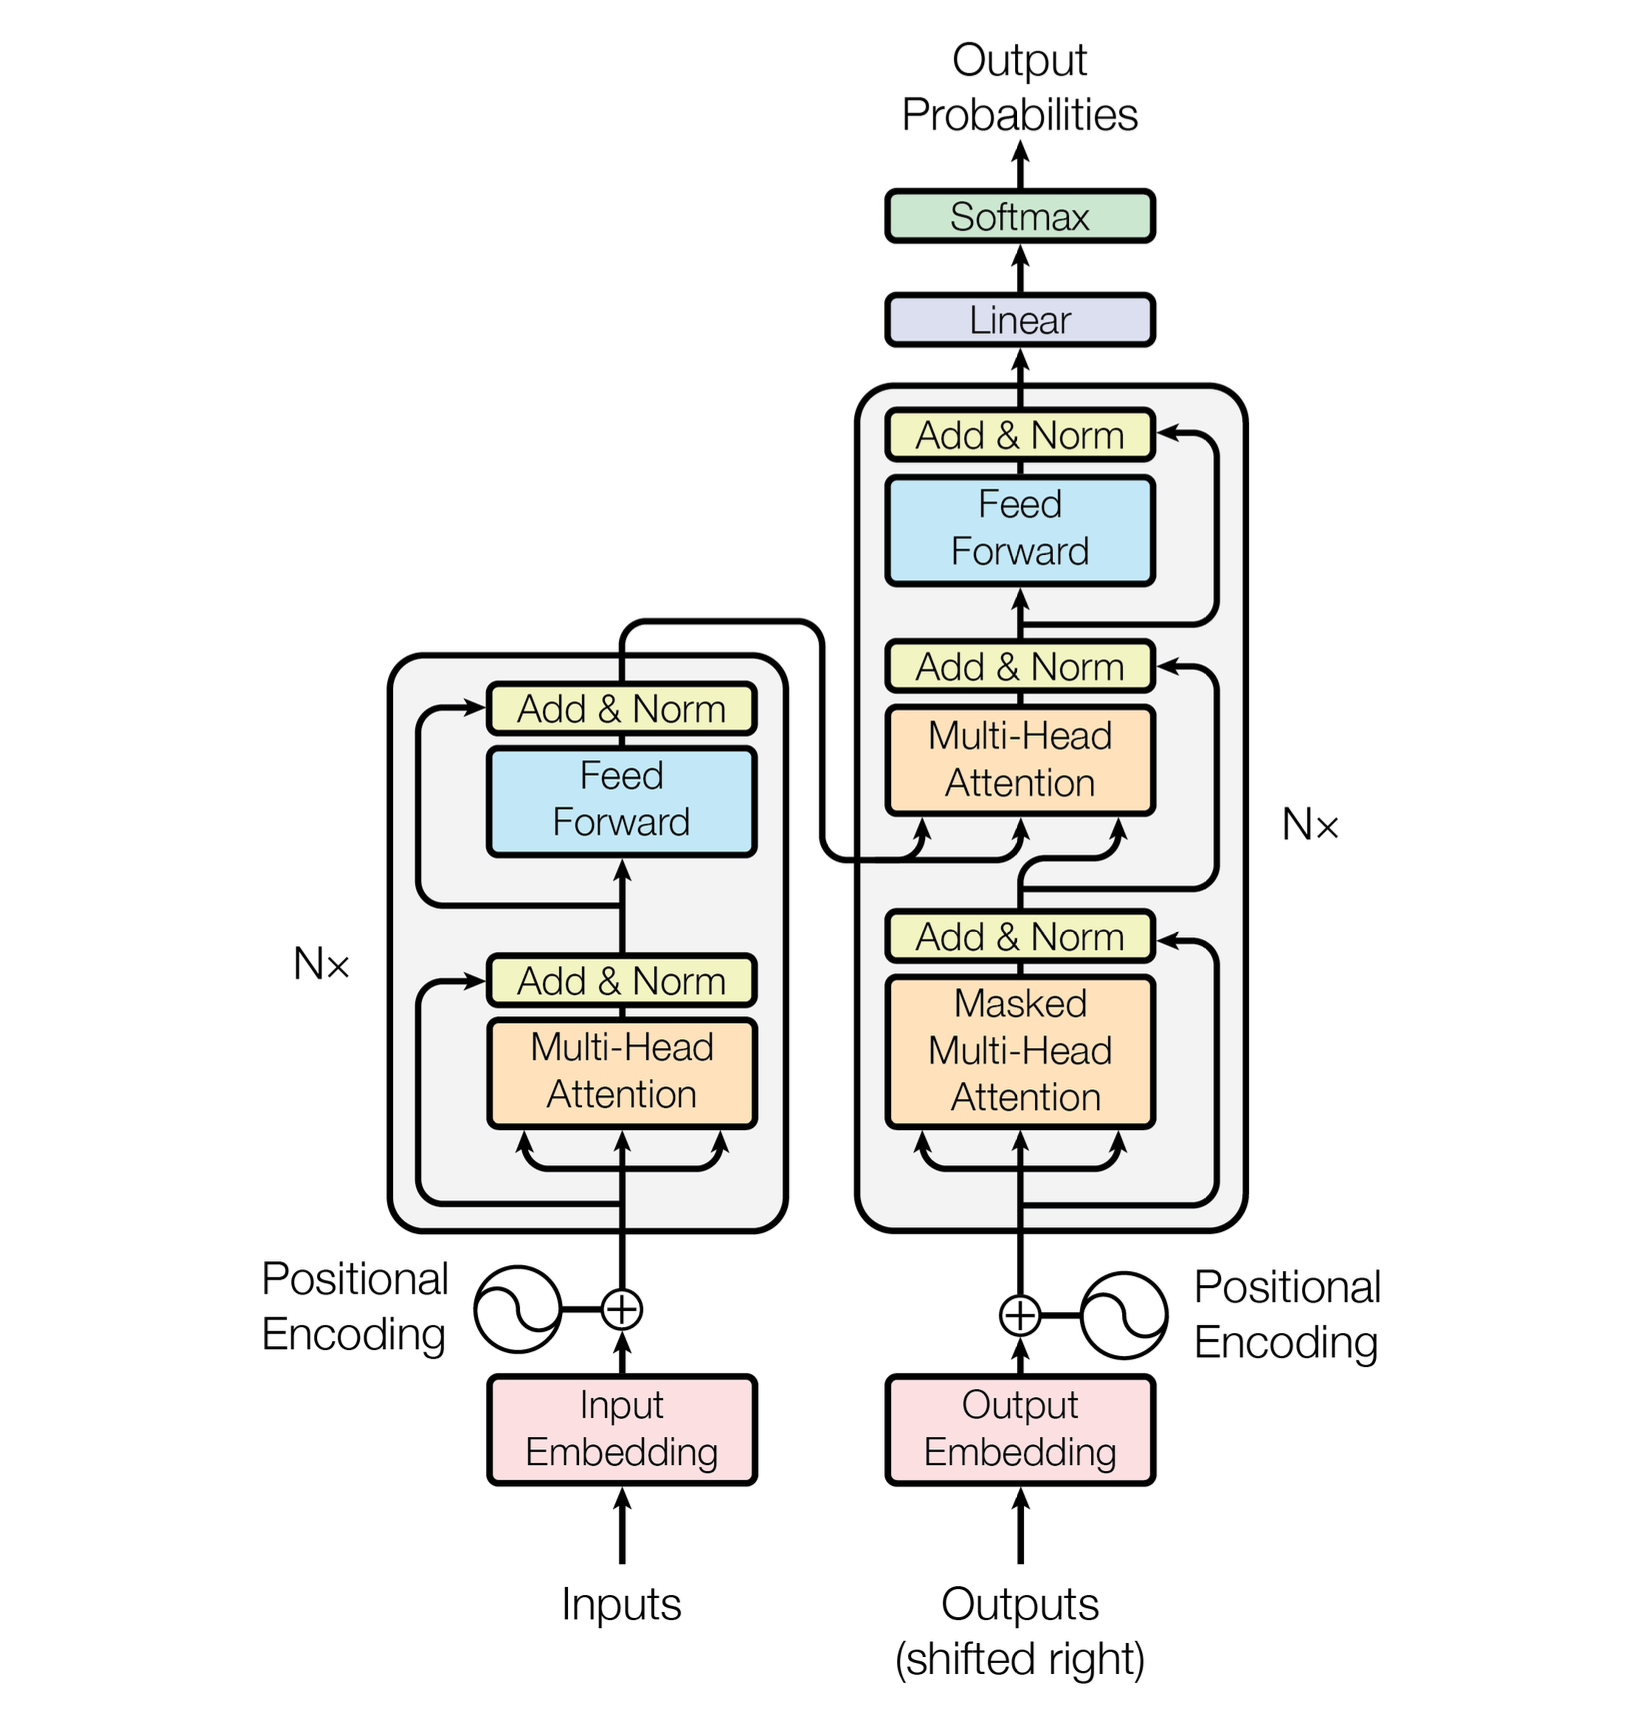

## 2. Encoder, Decoder

### 2.1 Encoder output is the **N** embedding results of **N** input tokens. 
### 2.2 In Decoder, each step's generated output is cacluated by: 

1. Encoder output; 
2. The previous outputs as sequence tokens; 

Therefore, we can generate tokens step by step. 

### 2.3 Mask Weight in Decoder

In order to get more powerful generative capability. Give encoder's output: 

$$ \mathbf{E} = \begin{pmatrix} \vec{e_1} \\  \vec{e_2}  \\  \vec{e_3}  \\  \vec{e_x}  \\  \vec{e_N}   \end{pmatrix} $$

We let the attention caculation in decoder part with some mask. It means, the output of the decoder's transformer: 

$$ Decoder-\mathbf{E} = \begin{pmatrix} \vec{DE_1} = f(\vec{e_1}) \\ 
\vec{DE_2} =f(\vec{e_1}, \vec{e_2})  \\  
\vec{DE_3} =f(\vec{e_1}, \vec{e_2}, \vec{3}) \\
\vec{DE_x} =f(\vec{e_1}, \vec{e_2}, \vec{...}) \\  
\vec{DE_N}  =f(\vec{e_1}, \vec{e_2}, \vec{...}, \vec{N})  \end{pmatrix} $$

### To implement this, we use the help of trill matrix

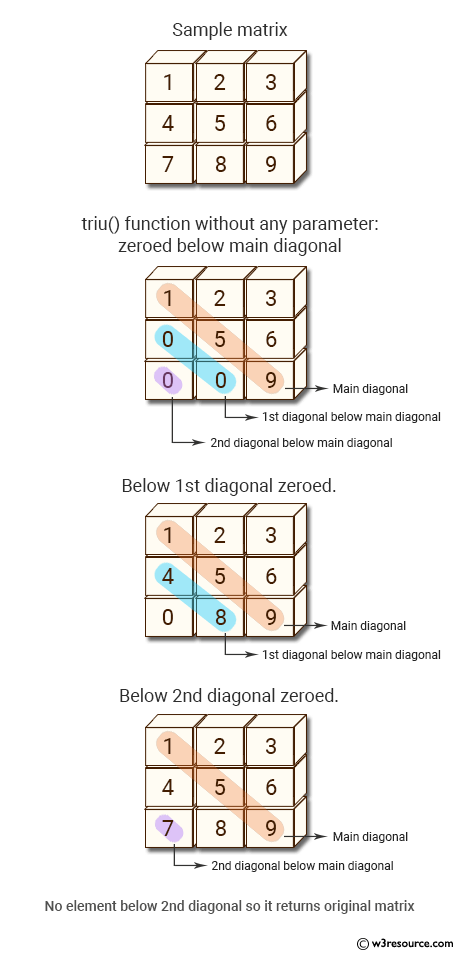

$$ unmasked-\mathbf{W} = \begin{pmatrix}  w_{11}, w_{12}, w_{13}, ... w_{1N} \\
 w_{21}, w_{22}, w_{23}, ... w_{2N} \\
 w_{x1}, w_{x2}, w_{x3}, ... w_{xN} \\
 w_{N1}, w_{N2}, w_{N3}, ... w_{NN} 
\end{pmatrix} $$

$$ masked-\mathbf{W} = \begin{pmatrix}  w_{11}, -\infty, -\infty , ... -\infty \\
 w_{21}, w_{22}, -\infty, ... -\infty \\
 w_{x1}, w_{x2}, w_{x3}, ... -\infty \\
 w_{N1}, w_{N2}, w_{N3}, ... w_{NN} 
\end{pmatrix} $$

for example, the second row of masked-$\mathbf{W}$ will be $\begin{pmatrix} p_1, p_2, 0, 0, 0, ..., 0\end{pmatrix}, p_1 + p_2 = 1$

code example: 

In [61]:
import torch

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [70]:
length = 10

In [71]:
tril = torch.tril(torch.ones(length, length))

In [72]:
tril

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [73]:
from torch import nn

In [83]:
embedding_dim = 16

In [85]:
batch = 8

In [109]:
x_embedding = torch.rand(8, length, embedding_dim)

In [110]:
x_embedding

tensor([[[0.2056, 0.6953, 0.0261,  ..., 0.9185, 0.2831, 0.3856],
         [0.9383, 0.1654, 0.7320,  ..., 0.2057, 0.1396, 0.3951],
         [0.2730, 0.9705, 0.8503,  ..., 0.9797, 0.4076, 0.9011],
         ...,
         [0.9950, 0.6464, 0.4568,  ..., 0.7647, 0.1667, 0.1278],
         [0.5194, 0.7046, 0.7443,  ..., 0.7837, 0.1226, 0.9562],
         [0.7817, 0.2940, 0.6524,  ..., 0.7265, 0.9135, 0.7855]],

        [[0.8043, 0.8026, 0.8212,  ..., 0.5367, 0.1366, 0.5412],
         [0.0692, 0.8823, 0.4223,  ..., 0.9192, 0.1535, 0.7118],
         [0.1699, 0.2428, 0.7975,  ..., 0.3305, 0.9742, 0.5134],
         ...,
         [0.9682, 0.7015, 0.3944,  ..., 0.6460, 0.1551, 0.1418],
         [0.1829, 0.5900, 0.4420,  ..., 0.9697, 0.5311, 0.9058],
         [0.2624, 0.6806, 0.2343,  ..., 0.3995, 0.0054, 0.7647]],

        [[0.7020, 0.0387, 0.6152,  ..., 0.1528, 0.2130, 0.7945],
         [0.8715, 0.8708, 0.8767,  ..., 0.9160, 0.7859, 0.0790],
         [0.8694, 0.7835, 0.9324,  ..., 0.5103, 0.3301, 0.

In [92]:
query = nn.Linear(embedding_dim, length)
key = nn.Linear(embedding_dim, length)

In [145]:
weights = query(x_embedding) @ key(x_embedding).transpose(1, 2)

In [146]:
weights = weights.masked_fill(tril == 0, float('-inf'))

In [147]:
weights

tensor([[[ 1.1137e-01,        -inf,        -inf,        -inf,        -inf,
                 -inf,        -inf,        -inf,        -inf,        -inf],
         [ 2.3069e-01,  6.8978e-01,        -inf,        -inf,        -inf,
                 -inf,        -inf,        -inf,        -inf,        -inf],
         [ 1.6548e-02,  1.2531e+00,  6.5788e-01,        -inf,        -inf,
                 -inf,        -inf,        -inf,        -inf,        -inf],
         [-1.2123e-01,  7.3387e-01,  3.8615e-01,  3.4084e-01,        -inf,
                 -inf,        -inf,        -inf,        -inf,        -inf],
         [-1.9335e-01,  8.8077e-01,  4.8548e-01,  3.0303e-01,  4.3051e-01,
                 -inf,        -inf,        -inf,        -inf,        -inf],
         [-3.7883e-02,  1.2383e+00,  6.2909e-01,  3.8836e-01,  5.4554e-01,
           6.4335e-01,        -inf,        -inf,        -inf,        -inf],
         [ 1.2308e-01,  8.0944e-01,  6.4293e-01,  5.1959e-01,  5.3604e-01,
           8.3882e-

In [148]:
weights[0]

tensor([[ 0.1114,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
            -inf,    -inf],
        [ 0.2307,  0.6898,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
            -inf,    -inf],
        [ 0.0165,  1.2531,  0.6579,    -inf,    -inf,    -inf,    -inf,    -inf,
            -inf,    -inf],
        [-0.1212,  0.7339,  0.3861,  0.3408,    -inf,    -inf,    -inf,    -inf,
            -inf,    -inf],
        [-0.1933,  0.8808,  0.4855,  0.3030,  0.4305,    -inf,    -inf,    -inf,
            -inf,    -inf],
        [-0.0379,  1.2383,  0.6291,  0.3884,  0.5455,  0.6434,    -inf,    -inf,
            -inf,    -inf],
        [ 0.1231,  0.8094,  0.6429,  0.5196,  0.5360,  0.8388,  0.5710,    -inf,
            -inf,    -inf],
        [ 0.1085,  1.0267,  0.5169,  0.4147,  0.4697,  0.6953,  0.3831,  0.6312,
            -inf,    -inf],
        [ 0.0746,  0.8949,  0.5234,  0.5423,  0.5107,  0.6514,  0.4513,  0.5375,
          0.3716,    -inf],
        [-0.1077,  

In [149]:
from torch.nn import functional as F

In [150]:
weights = F.softmax(weights, dim=-1)

In [151]:
weights.shape

torch.Size([8, 10, 10])

In [152]:
weights[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.3872, 0.6128, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.1577, 0.5429, 0.2994, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.1515, 0.3563, 0.2517, 0.2405, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.1063, 0.3112, 0.2096, 0.1746, 0.1984, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0845, 0.3028, 0.1647, 0.1294, 0.1515, 0.1670, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0887, 0.1762, 0.1491, 0.1318, 0.1340, 0.1814, 0.1388, 0.0000, 0.0000,
         0.0000],
        [0.0793, 0.1987, 0.1194, 0.1078, 0.1139, 0.1427, 0.1044, 0.1338, 0.0000,
         0.0000],
        [0.0707, 0.1605, 0.1107, 0.1128, 0.1093, 0.1258, 0.1030, 0.1122, 0.0951,
         0.0000],
        [0.0604, 0.1768, 0.1020, 0.0826, 0.0897, 0.1003, 0.0788, 0.1085, 0.0894,
         0.1115]], grad_fn=<

In [153]:
weights[1]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.4698, 0.5302, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.2689, 0.2720, 0.4590, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.1664, 0.1779, 0.3114, 0.3443, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.1524, 0.1845, 0.2180, 0.2701, 0.1749, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.1108, 0.1181, 0.2186, 0.2313, 0.1334, 0.1879, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0882, 0.1321, 0.2063, 0.1988, 0.0969, 0.1719, 0.1058, 0.0000, 0.0000,
         0.0000],
        [0.0722, 0.0919, 0.1735, 0.2145, 0.0921, 0.1648, 0.0821, 0.1089, 0.0000,
         0.0000],
        [0.0808, 0.0717, 0.1673, 0.1750, 0.0921, 0.1565, 0.0993, 0.0986, 0.0587,
         0.0000],
        [0.0729, 0.0808, 0.1405, 0.1469, 0.0878, 0.1159, 0.0827, 0.0954, 0.0718,
         0.1053]], grad_fn=<

In [154]:
value = nn.Linear(embedding_dim, length, bias=False)

In [155]:
values = value(x_embedding)

In [156]:
attention = weights @ values

In [157]:
attention.shape

torch.Size([8, 10, 10])

In [158]:
attention

tensor([[[-2.7935e-01, -3.5519e-01,  1.9156e-01,  3.7070e-02, -9.0959e-01,
           1.8629e-01, -1.7781e-02,  8.6985e-02,  2.7249e-01, -8.1347e-01],
         [-2.3999e-01, -4.0119e-01,  1.7608e-01, -1.3713e-01, -7.4152e-01,
           2.9826e-01, -2.3009e-01,  2.4267e-01,  3.9908e-02, -6.4439e-01],
         [-1.2535e-01, -3.9988e-01,  1.1859e-01, -1.0653e-01, -6.4235e-01,
           2.9387e-01, -2.5138e-01,  3.1810e-01,  4.5949e-02, -6.0178e-01],
         [-1.0807e-01, -3.5789e-01,  5.6311e-02,  3.6367e-03, -5.8106e-01,
           3.2462e-01, -1.9158e-01,  3.0018e-01,  1.7336e-02, -5.5101e-01],
         [-9.2052e-02, -3.4667e-01,  7.4261e-02, -1.7949e-02, -5.6461e-01,
           2.8446e-01, -2.4158e-01,  3.1111e-01, -2.6395e-02, -4.7947e-01],
         [-3.4294e-02, -3.5963e-01,  8.4541e-02,  8.9405e-03, -5.6598e-01,
           2.6705e-01, -2.3946e-01,  3.4410e-01, -6.0952e-02, -4.4243e-01],
         [-2.9467e-02, -3.5332e-01,  9.8614e-02,  4.4612e-02, -5.8190e-01,
           2.7265e-


### 3. BERT, GPT

BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding"

Use only encoding part, by define one of the fellowing tasks: 

1. **Masked Language Modeling (MLM)**: In MLM, a certain percentage of the input tokens are randomly masked, and the model is tasked with predicting the original masked tokens. This objective helps BERT learn contextual relationships between words and capture bidirectional information. The masked tokens are replaced with a special [MASK] token during training. The loss function used for MLM is typically cross-entropy loss, comparing the predicted probabilities of the masked tokens with the true masked token labels.

2. **Next Sentence Prediction (NSP)**: The NSP objective involves determining whether two sentences appear consecutively in the original text or are sampled from unrelated sentences. This objective helps BERT learn relationships between sentences and improve its understanding of discourse and context. During training, pairs of sentences are randomly sampled, and the model is trained to predict whether the second sentence follows the first sentence. The loss function used for NSP is usually binary cross-entropy loss, comparing the predicted probability of the next sentence relationship with the true label.

**BERT**: is good at text understanding, because of the embeddings are combined the contextual information.(surrounding) 

## GPT: Generative Pre-trained Transformer

is a variant of the Transformer architecture widely used for natural language processing tasks. GPT is primarily designed for language generation, including text completion, text generation, and language modeling.

Key characteristics of GPT:

1. **Transformer-based architecture**: GPT utilizes the Transformer architecture, which employs self-attention mechanisms to capture contextual dependencies in the input sequence.

2. **Autoregressive generation**: GPT follows an autoregressive approach, where it predicts the next token in a sequence based on the previous tokens. This enables it to generate coherent and contextually appropriate text.

3. **Language modeling**: GPT is often pre-trained on a large corpus of text using unsupervised learning, aiming to learn the statistical properties of language. This pre-training phase helps GPT understand syntax, semantics, and context.

4. **Fine-tuning for specific tasks**: After pre-training, GPT can be fine-tuned on specific downstream tasks, such as sentiment analysis or named entity recognition, by training it on task-specific labeled data.

5. **Applications**: GPT is widely used for various natural language processing tasks, including text completion, dialogue generation, machine translation, summarization, question answering, and more.

6. **Contextual understanding**: GPT excels at capturing long-range dependencies and context in language, allowing it to generate coherent and contextually relevant text.

GPT has achieved impressive results in natural language generation tasks and has been widely adopted for various applications in the field of natural language processing.

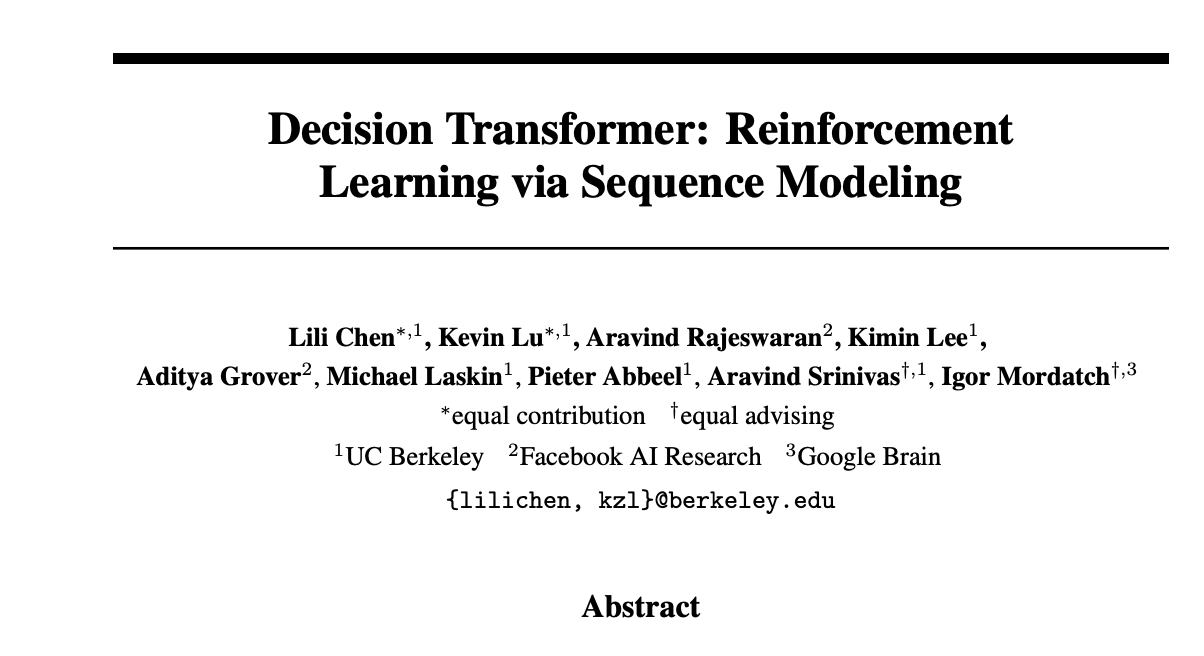

#### link: https://arxiv.org/pdf/2106.01345.pdf

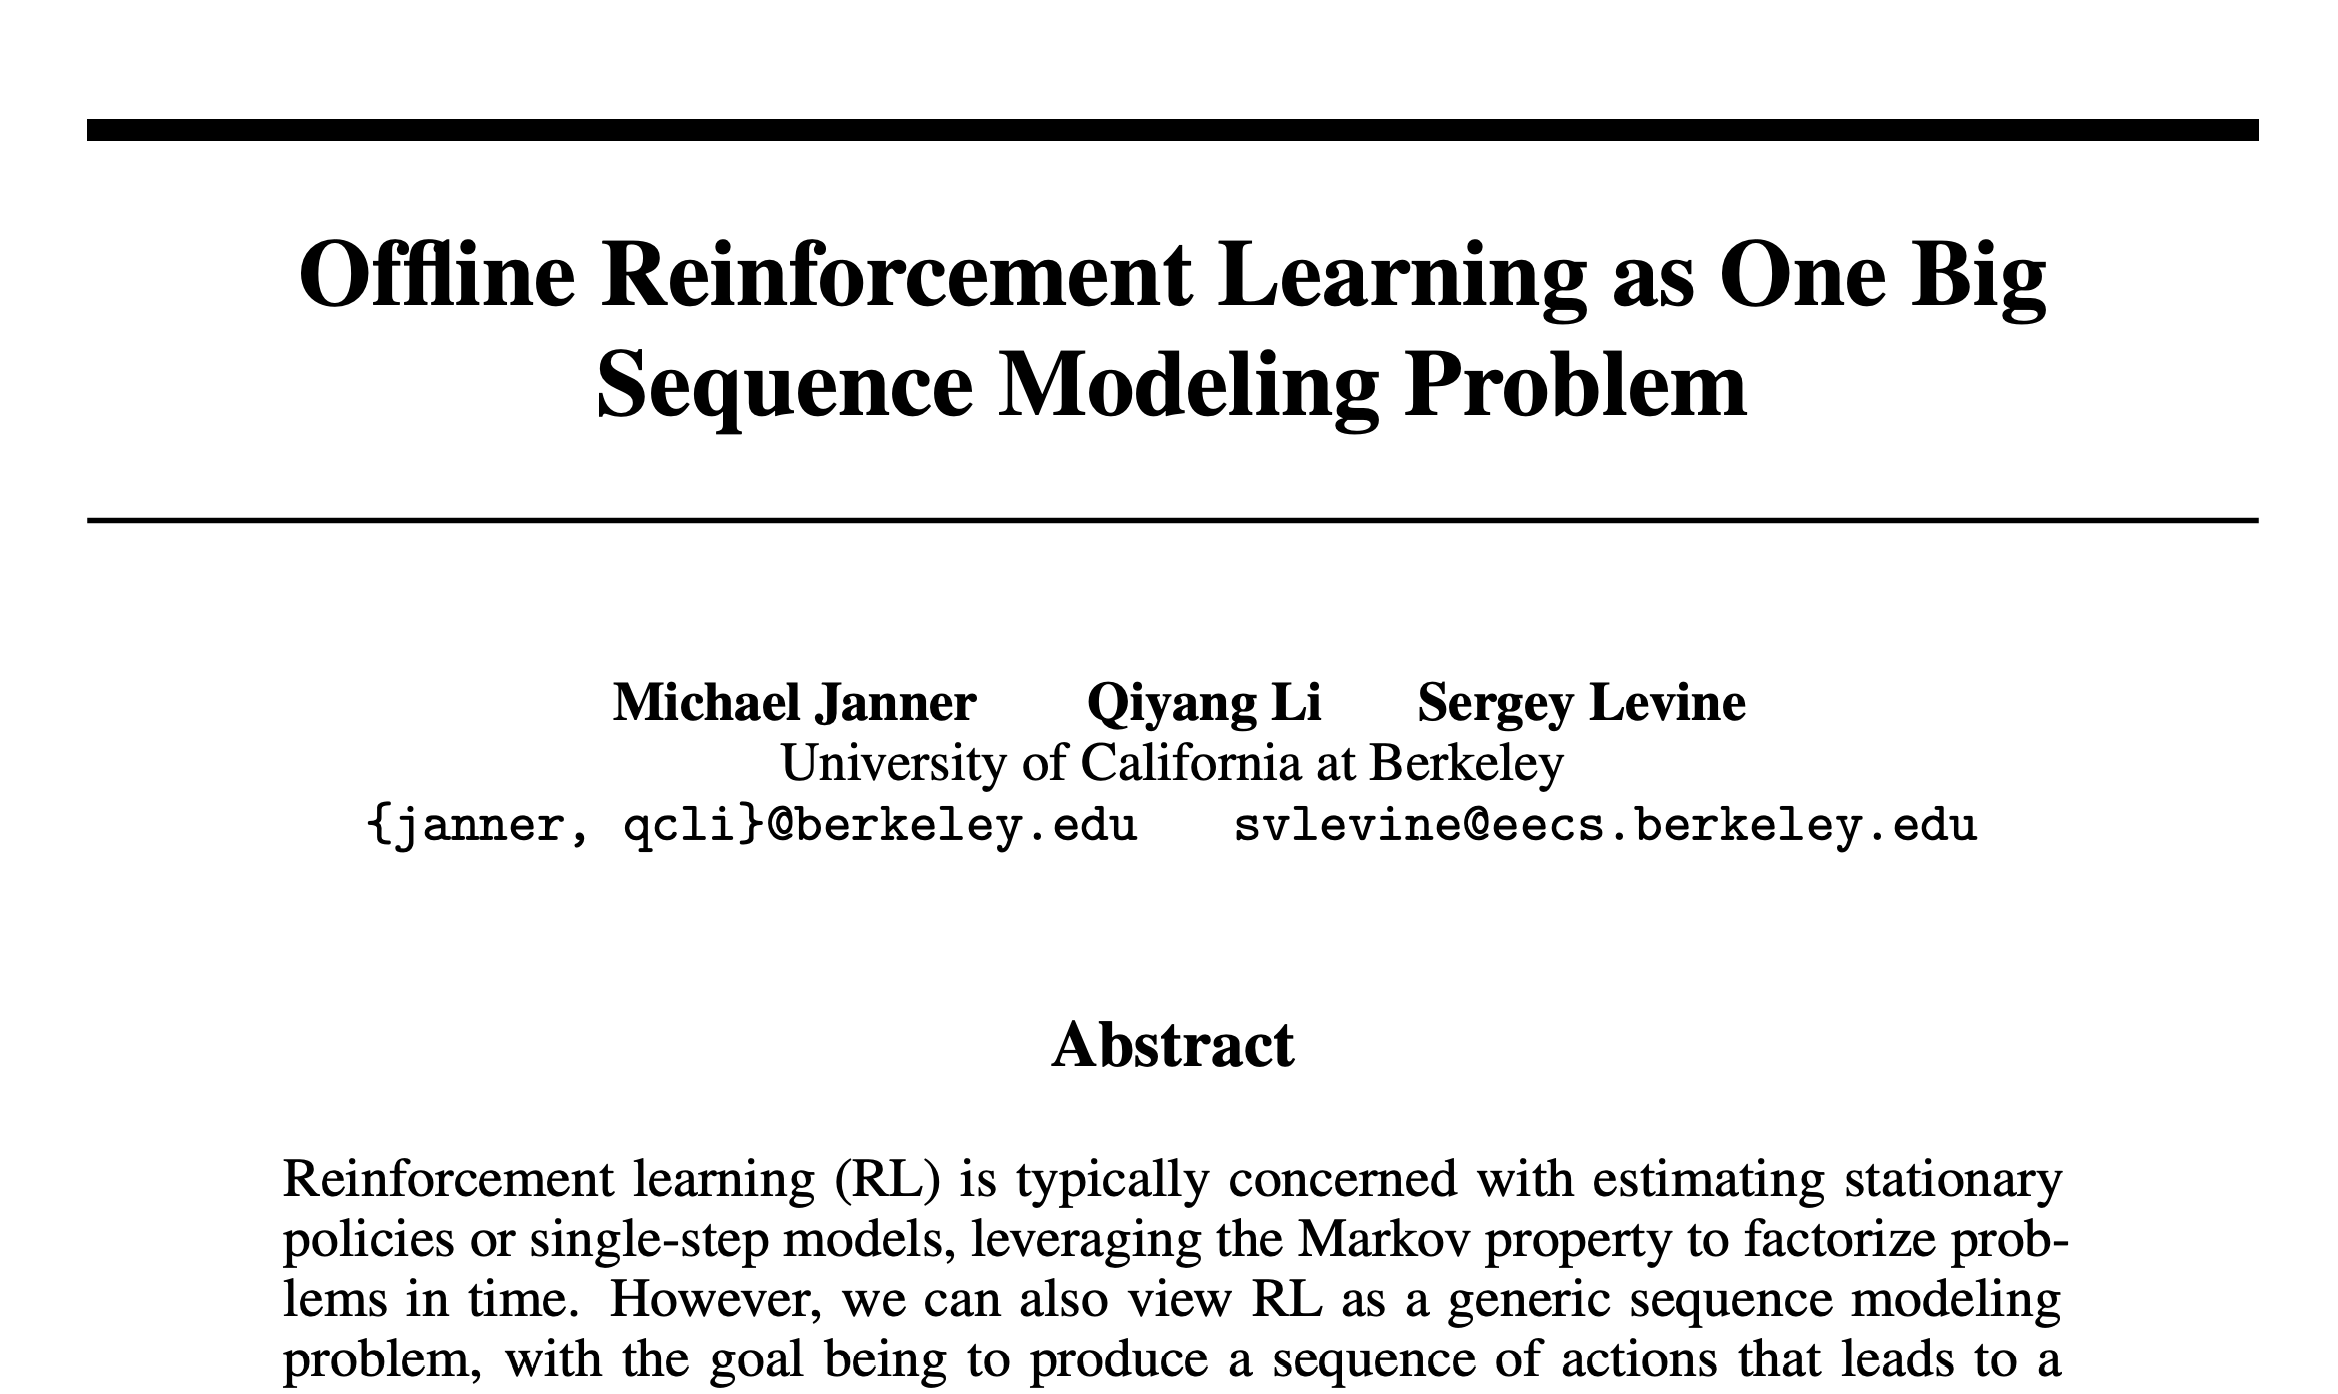

#### link: https://arxiv.org/pdf/2106.02039.pdf